In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
from datetime import date
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-05 17:12:58.783487: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-05 17:12:58.807470: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 17:12:58.937088: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 17:12:58.938246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
162516,B0006ITZ4S,Children of the Mind,NaN,AB68LG08VDFL3,R. Icks,0/0,5.0,1187395200,Yes!!,"This novel, the fourth in the Ender's Game ser..."
914778,B00005VPYB,Crawlspace,NaN,A1910QO2FW3OBQ,"nusandman ""nusandman""",11/11,5.0,1011916800,Poor Richard,Crawlspace is a book that my friend Chuck had ...
1044706,B000J68V8I,Sunk!,NaN,AJUG9BGD03QQL,Gunnarbabramson,0/0,4.0,1178064000,A Good General Insider's History of WWII IJN S...,Sunk! is a good overview of IJN sub ops in WWI...
507927,B000OVCSWS,Norstrilia,NaN,A21Z8FUB9IZI2L,not4prophet,11/24,3.0,1136419200,Puzzling,"I just finished ""Norstrilia"" a couple days ago..."
2577448,0670032093,When Presidents Lie: A History of Official Dec...,NaN,A34BYYNYG6CHNX,"Sean R. Funk ""sfunk1x""",9/11,5.0,1103068800,An excellent examination of recorded events an...,Some people may scoff at the idea of exposing ...
1129201,0152020195,The Pig in the Spigot,NaN,A9548V2EHM46B,"IT Man ""sagamore""",3/3,5.0,980899200,Phun Phonics!,"Great illustrations, a fun addition to a phoni..."
2904418,0962481351,Claim Paid: A Consumers Guide Through the Insu...,NaN,A3SU5P2IT1DCMQ,"Jimmy Stewart ""RadioComputerSupply.com""",1/1,5.0,1229126400,Worth the cost of the book,Used this for my claim and it was worth every ...
1406071,0763726753,Accounting Fundamentals for Health Care Manage...,88.73,A3DJKLLLWYYMG5,dmos,0/0,4.0,1305331200,I like it,Used it a fair amount for school that only pro...
765876,B000NIMREG,A Girl of the Limberlost,NaN,AMD7RGC6GT3DQ,Halifig,0/0,5.0,1295308800,Great book,I enjoyed this book a great deal. I was amazed...
973107,B000P0Y1BE,Journey to the Center of the Earth,NaN,A1C2T3URP6IJ2R,HIDHO,0/0,5.0,1319328000,Thank you Amazon,Thank you Amazon for choosing A Journey to the...


In [5]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
96914,Sociological Theory in the Classical Era: Text...,"Sociological Theory in the Classical Era, Four...","['Laura Desfor Edles', 'Scott Appelrouth']",http://books.google.com/books/content?id=IHXnD...,http://books.google.com/books?id=IHXnDwAAQBAJ&...,SAGE Publications,2020-06-18,http://books.google.com/books?id=IHXnDwAAQBAJ&...,['Social Science'],NaN
8415,A Plethora of Platitudes: A Collection of Clic...,"Platitudes, cliches and adages are pervasive i...",['Jay J. Smith'],http://books.google.com/books/content?id=tWewH...,http://books.google.nl/books?id=tWewH7VmI88C&p...,iUniverse,2000-07-11,https://play.google.com/store/books/details?id...,['Literary Collections'],NaN
156265,"Three who made a revolution,: A biographical h...","Biographical history of Lenin, Trotsky, and St...",['Bertram David Wolfe'],http://books.google.com/books/content?id=-sMeA...,http://books.google.com/books?id=-sMeAAAAMAAJ&...,New York : Dial Press,1964,http://books.google.com/books?id=-sMeAAAAMAAJ&...,['Políticos'],NaN
112197,A Prescription for Long-Lasting Youth: How els...,After thirty-eight years working in the comput...,['Dian Jen'],http://books.google.com/books/content?id=Z7RbH...,http://books.google.nl/books?id=Z7RbHpkeay0C&p...,Author House,2006-02-17,https://play.google.com/store/books/details?id...,['Health & Fitness'],NaN
26288,Detroit Then and Now (Then & Now),Founded in 1701 by Antoine de le Mothe Cadilla...,['Cheri Y. Gay'],http://books.google.com/books/content?id=9lDUD...,http://books.google.com/books?id=9lDUDwAAQBAJ&...,Rizzoli Publications,2016-04-01,http://books.google.com/books?id=9lDUDwAAQBAJ&...,['Photography'],2.0
103179,Pictorial analysis of power volleyball,NaN,"['James E. Coleman', 'Taras N. Liskevych']",NaN,http://books.google.com/books?id=pUopGQAACAAJ&...,NaN,1976,http://books.google.com/books?id=pUopGQAACAAJ&...,['Volleyball'],NaN
196942,Deep Empire (Deathlands),Ryan Cawdor and his band of warrior-survivalis...,['James Axler'],NaN,http://books.google.com/books?id=F_NyAAAACAAJ&...,Harlequin Books,1993-12-01,http://books.google.com/books?id=F_NyAAAACAAJ&...,['Fiction'],NaN
177589,Measuring and Monitoring Biological Diversity:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52804,A Suitable Job for a Woman: Inside the World o...,"Reviews of the Series: ""The McFarland Companio...",['Margaret Kinsman'],http://books.google.com/books/content?id=se0tD...,http://books.google.com/books?id=se0tDQAAQBAJ&...,McFarland,2016-09-29,http://books.google.com/books?id=se0tDQAAQBAJ&...,['Literary Criticism'],NaN
62830,Squeaky Clean,Squeaky Clean Keto marries the principles of c...,['Mellissa Sevigny'],http://books.google.com/books/content?id=CZYIE...,http://books.google.com/books?id=CZYIEAAAQBAJ&...,Victory Belt Publishing,2020-06-16,http://books.google.com/books?id=CZYIEAAAQBAJ&...,['Cooking'],NaN


In [7]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: Unique identifier for each user performing the review. Variable with cardinality excess. 
#   - User_id: Unique identifier for each user performing the review. Variable with cardinality excess.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.
#   - Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
#       book Title will always have the same author. So, authors feature is kept and Title is removed.    
#       This feature is removed later as it will be used to join both Datasets. 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName', 'User_id','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [10]:
df_rating_processed.sample(10)

,Title,review/helpfulness,review/score,review/time,review/text
1508293,"Counterpunch: Making Type in the 16th Century,...",3/3,5.0,1011225600,"This is a wonderful book. To write it, Fred Sm..."
2634284,Central Philosophy of Buddhism: A Study of Mad...,5/5,5.0,1215820800,This classic is a wonderful exposition of the ...
1482622,"Tezuka School of Animation, 1: Learning the Ba...",3/3,5.0,1141084800,This book is one of the most useful tools for ...
1544951,Power/Knowledge: Selected Interviews and Other...,12/17,5.0,1008547200,"The relationship between knowledge, truth and ..."
423418,How To Make Your Business Run Without You,31/32,5.0,960249600,An associate of mine recommended this book to ...
2491368,The Hobbit,0/0,4.0,939081600,"Poor Bilbo Baggins! Once a short, rather plump..."
1621306,The Matisse Stories,2/6,2.0,1053907200,I think this was probably a bad book to pick. ...
1135774,"Catherine: The Great Journey, Russia, 1743 (Th...",0/1,4.0,1178841600,"This diary, about Catherine the Great, was enj..."
2099192,Shibumi/Shibumi (Spanish Edition),2/2,5.0,982281600,I have read all of Trevanian's books I came ac...
222659,Chesapeake Blue (Chesapeake Bay Series),0/1,5.0,1054080000,I bought the CD unabridged. It's the first tim...


In [11]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title',                                                        
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [12]:
df_rating_processed.isna().sum()

title          208
helpfulness      0
review           0
review_time      0
text             8
dtype: int64

In [13]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [14]:
#CLEAN THE DATASETS

In [15]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [16]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
116534,Linear Programming,"['Jiri Matousek', 'Bernd Gärtner']",Springer Science & Business Media,2006-10-05,['Mathematics']
58040,The Individual and His Religion: A Psychologic...,['Gordon Willard Allport'],Macmillan Publishing Company,1960,['Religion']
81653,What Is the Baha'i Faith?,['Peter Smith'],Cambridge University Press,2008-04-07,['History']
33642,Environmental Policies in the Third World,"['O. P. Dwivedi', 'Dhirendra K. Vajpeyi']",Praeger,1995,['Political Science']
87094,Shifting Frequencies,"['Jonathan Goldman', 'Shamael']",Light Technology Publishing,2010-01-01,"['Body, Mind & Spirit']"


In [17]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [18]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [19]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [20]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
118086,"The Forever Stories-Boxed Set, 5 Vol.",['Carolyn Byers'],Review & Herald Publishing,NaN,1990
155780,Everybody's Historic London: A History and Guide,['Jonathan Kiek'],NaN,['Travel'],1984
4366,Design and construction of the Pochuck Quagmir...,['Tibor Latincsics'],NaN,['Suspension bridges'],1998
142786,Passing Time,['W.D. Ehrhart'],McFarland,['History'],2016
139185,The Backup Book: Disaster Recovery from Deskto...,['Dorian Cougias'],Turtleback,NaN,2003
112180,Esoteric astrology (A treatise on the seven rays),['Alice A. Bailey'],Lucis Pub,"['Body, Mind & Spirit']",1975
119765,"The River of Light: Spirituality, Judaism, Con...",['Lawrence Kushner'],Jewish Lights Pub,['Religion'],1990
122386,The Significance of Silence,['Arnold T. Olson'],NaN,NaN,1981
25987,The AWK Programming Language,"['Alfred V. Aho', 'Brian W. Kernighan', 'Peter...",Addison-Wesley,['Computers'],1988
19695,The Family of Man,['The Museum of Modern Art (New York)'],NaN,NaN,1955


In [21]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [22]:
#Updating the Authors to a list.
#Updating Categories to list
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [23]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [24]:
df_rating_processed.sample(5)

,title,helpfulness,review,review_time,text
2694026,The grouchy ladybug,3/4,1.0,1317081600,Throughout this book the same words are repeat...
44773,A Woman of Substance,0/0,5.0,1335744000,I read this book years ago when it first came ...
2692735,"Investing for Dummies, Second Edition",81/86,3.0,1019347200,I enjoyed this book and found the investment i...
1014533,Sphere,0/1,4.0,1043452800,Many reviewers here have complained about the ...
665798,Emma (Progress English),0/0,2.0,1357257600,I didn't enjoy reading this in college and I d...


In [25]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [26]:
df_rating_processed.sample(10)

,title,helpfulness,review,text,review_year
2647218,Hippopotamus,5/5,4.0,When your first novel is as good as _The Liar_...,2000
1149375,ADVENTURES IN MY YOUTH: A German Soldier on th...,0/1,3.0,Although this biography was not intended to be...,2012
2322898,Holy Feast and Holy Fast: The Religious Signif...,6/6,5.0,Holy Feast and Holy Fast: The Religious Signif...,2009
1655359,The Cyberiad,2/2,5.0,"Lem is great at between-the-eyes satire, roll-...",1998
397609,Hidden,0/1,4.0,"I enjoyed this book very much, I have only rea...",2005
1133987,George Orwell 1984,0/0,5.0,George Orwell has written another well written...,2000
137137,The Princess Bride,0/0,5.0,I absolutely LOVED this book. The movie is als...,1999
1795641,Lonesome Dove,2/2,5.0,What more can say that hasn't already been sai...,2005
1650694,The Rough Guide to Rome Map (Rough Guide City ...,0/0,5.0,I was in Rome for a week during Holy Week no l...,2010
1604306,Who Moved My Cheese? An-Amazing Way to Deal wi...,14/16,1.0,Last June our new Executive Director at work g...,2000


In [27]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [28]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [29]:
df_rating_processed.sample(10)

,title,review,text,review_year,helpfulness_0,helpfulness_1
2457929,Southern Spice,4.0,I am not a vegetarian and wouldn't normally bu...,2011,0.000000,1.000000
1468006,Fire-hunter,5.0,I've read sf stories and many novels that lift...,2002,0.000000,1.000000
1365410,The Red Tent (Bestselling Backlist),5.0,"The book The Red Tent, by Anita Diamant, was a...",2002,0.750000,0.750000
486565,Alice's Adventures in Wonderland and Through t...,5.0,I have an avid young reader in my family and i...,2012,0.000000,1.000000
1876610,Heart of Darkness. (Heritage Club Series),5.0,A Gripping tale told by a writer who ought to ...,2013,0.000000,1.000000
1056257,Frankenstein (Running Press classics),5.0,What can you say about Frankenstein? Mary Shel...,2000,0.000000,0.000000
2300007,The sun also rises (The Modern library of the ...,5.0,"somehow, hemmingway managed to create a novel ...",2000,0.000000,0.000000
932714,We Band of Angels: The Untold Story of America...,5.0,This is a fantastic book that tells the herois...,1999,1.000000,1.000000
483742,"Making the Fascist state,",5.0,The author was a research fellow in Italy in 1...,2007,0.500000,0.500000
370234,The Sword in the Stone,5.0,The Sword in the Stone is a truly wonderful bo...,2001,0.863636,0.863636


In [30]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   review          float64
 2   text            object 
 3   review_year     int64  
 4   helpfulness_0   float64
 5   helpfulness_1   float64
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 203.4+ MB


Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
        book Title will always have the same author. So, authors feature is kept and Title is removed.

In [31]:
df_all_data_processed = df_all_data_processed.drop(['title'], axis=1)

In [32]:
df_all_data_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
1619661,5.0,I really enjoy Lisa Kleypas books. She gets th...,2008,0.666667,0.666667,[Jennifer Weiner],Simon and Schuster,[Fiction],2012
2100736,5.0,"Ordered on Nov 26 & received on Dec 2, 2010. V...",2010,0.000000,1.000000,[Barbara Bush],Simon and Schuster,[Biography & Autobiography],2015
1455000,5.0,"I was on a USMC book kick a couple years ago, ...",2008,1.000000,1.000000,[G. F. Borden],Presidio Press,[Fiction],1995
1253187,5.0,"Starship Troopers is the story of Johnny Rico,...",2006,1.000000,1.000000,[Robert Anson Heinlein],Penguin,[Fiction],1987
687368,3.0,"I like the explanations for different oils, ad...",2007,0.988636,0.988636,[Dorie Byers],"Square One Publishers, Inc.",[Health & Fitness],2013
2325181,5.0,This is truly a monumental work. Thank you on ...,2002,0.666667,0.666667,[Timothy C. Cahill],NaN,[India],2001
269912,5.0,Victor Niederhoffer is one of the true origina...,2003,0.533333,0.533333,[Victor Niederhoffer],John Wiley & Sons,[Business & Economics],1998
1829100,1.0,Let me tell you something.I feel concern about...,2009,0.000000,0.000000,"[Tom Bassarear, Meg Moss]",NaN,NaN,2019
282346,5.0,"I work for a record label, and this collection...",2006,0.500000,0.500000,[Shelly Field],Infobase Publishing,[Business & Economics],2008
2336276,5.0,"If you like Law & Order, if you like getting i...",2013,0.000000,1.000000,"[Joelle Jones, Jamie S Rich, Raquel Moritz]",NaN,NaN,1981


## Dataset Reduction/Sampling

Sample Size Calculation formula from Survey Monkey (https://www.surveymonkey.com/mp/sample-size-calculator/) is used to calculate a extract a ramdom sample of the dataset.
In order to reduce the dataset size and apply NLP to the text column.

For the given formula: 

   $$ sample size =  \frac{\frac{z^2xp(1-p)}{e^2}}{1 + \frac{z^2xp(1-p)}{e^2N}} $$

with:
- N = population size 
- e = Margin of error (percentage in decimal form) 
- z = z-score
- p = sample proportion


| Desired confidence level	| z-score |
|--------------------------|---------|
|            80%           |   1.28  |
|            85%	         |   1.44  |
|            90%	         |   1.65  |
|            95%	         |   1.96  |
|            99%	         |   2.58  |


Setting N = 2 666 313, e = 99% and z = 2.58

sample size = 578995. 

A sample of **578 995** entries will be extracted from the Dataset to be processed and to train and test the model.

In [33]:
N = df_all_data_processed.shape[0] - 1
e = 0.0015 #Margin of error = 0.15%
z = 2.58 # Desired confidence level = 99%, so z-score = 2.58
p = 0.5 #Used 0.5 as a conservative approach. It will give the largest sample size

sample_size = ( ((z*z)*p*(1-p))/(e*e) )/(1 + ((z*z)*p*(1-p))/(e*e*N) )

sample_size = round(sample_size)

print(f'Sample size is: {sample_size}')

Sample size is: 578995


In [34]:
#Extract the sample of 578995 entries from the dataset.
df_all_data_filtered_processed = df_all_data_processed.sample(n=sample_size, random_state=2125)

In [35]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578995 entries, 0 to 578994
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          578995 non-null  float64
 1   text            578995 non-null  object 
 2   review_year     578995 non-null  int64  
 3   helpfulness_0   578995 non-null  float64
 4   helpfulness_1   578995 non-null  float64
 5   authors         566598 non-null  object 
 6   publisher       481622 non-null  object 
 7   categories      531722 non-null  object 
 8   published_year  578995 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 39.8+ MB


In [36]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    349011
4.0    113195
3.0     48855
1.0     38541
2.0     29393
Name: count, dtype: int64

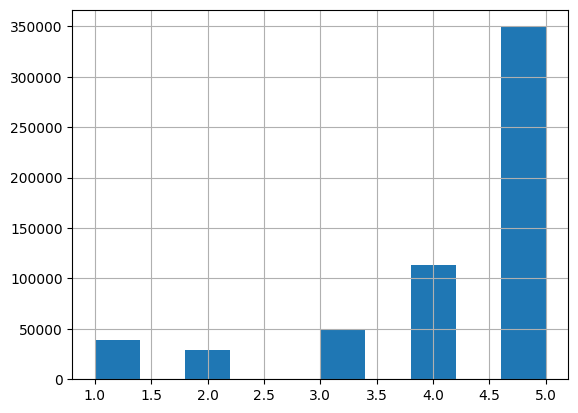

In [37]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [38]:
df_all_data_filtered_processed.isna().sum()

review                0
text                  0
review_year           0
helpfulness_0         0
helpfulness_1         0
authors           12397
publisher         97373
categories        47273
published_year        0
dtype: int64

In [39]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
433174,4.0,"This book is a biography of Martin Johnson, wr...",2006,0.800000,0.800000,[Osa Johnson],Vertical Inc,[Travel],2019
334423,3.0,I've read several reviews for Captivating and ...,2006,0.769231,0.769231,"[John Eldredge, Stasi Eldredge]",Thomas Nelson Inc,[Religion],2010
106344,5.0,"The writing was wonderful, and very descriptiv...",2007,0.500000,0.500000,[Charles II (koning van Groot-Brittannië en Ie...,NaN,NaN,1672
202813,4.0,Joyce Sullivan makes a welcome return to form ...,1999,1.000000,1.000000,[Joyce Sullivan],Harlequin Treasury-Harlequin Intrigue 90s,[Fiction],2000
178955,5.0,I have had enough acne to worry about coping w...,2005,1.000000,1.000000,[Lydia Preston],Simon and Schuster,[Health & Fitness],2007
385315,3.0,This book contains a depth of content that its...,1999,0.705882,0.705882,[G. K. Chesterton],Open Road Media,[Philosophy],2015
71538,4.0,Very interesting book. His ideas on the rise a...,2007,0.000000,0.000000,[Jared Diamond],W. W. Norton & Company,[History],2017
503357,5.0,This is a wonderful book. Too bad the medical ...,2012,1.000000,1.000000,"[Eydie Mae, Chris Loeffler]",Avery,[Social Science],1992
407036,5.0,I love this book. It's easy to read in that yo...,2008,1.000000,1.000000,"[Catherine Ponder, General Press]",GENERAL PRESS,[Self-Help],2018
361147,4.0,Steve is on the phone (and never appears in th...,2004,0.000000,1.000000,[Angela C. Santomero],Turtleback,[Juvenile Fiction],2002


In [40]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['review', 'text'])
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502046 entries, 0 to 502045
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          502046 non-null  float64
 1   text            502046 non-null  object 
 2   review_year     502046 non-null  int64  
 3   helpfulness_0   502046 non-null  float64
 4   helpfulness_1   502046 non-null  float64
 5   authors         490973 non-null  object 
 6   publisher       420055 non-null  object 
 7   categories      467215 non-null  object 
 8   published_year  502046 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 34.5+ MB


In [41]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
369302,5.0,I was ignorant with respect to the mind & any ...,2002,0.118644,0.118644,[L. Ron Hubbard],NaN,NaN,2007
501029,4.0,I really enjoyed this book. I love historical ...,2010,0.000000,1.000000,[Ross Morton],Linford,[Fiction],2012
129891,2.0,This book is a fairly typical historical roman...,2010,0.000000,1.000000,[Rachel L. Demeter],Createspace Independent Publishing Platform,NaN,2017
172349,5.0,Very entertaining read of the author's trip th...,2002,1.000000,1.000000,[Frances Milton Trollope],NaN,[Electronic books],1949
212760,5.0,LEft behind is one of the best books I have ev...,2000,0.416667,0.416667,"[Tim F. LaHaye, Jerry B. Jenkins]","Tyndale House Publishers, Inc.",[FICTION],2011
154401,5.0,This is without a doubt the best book in the w...,2001,1.000000,1.000000,[Margaret Mitchell],Random House,[Fiction],2020
269966,5.0,This was definetly one of the best books I hav...,2011,0.000000,1.000000,[John Flanagan],Penguin,[Juvenile Fiction],2006
85393,4.0,"Before Gwen Stefani, Madonna and Courtney Love...",2005,0.000000,1.000000,[Cathay Che],Andre Deutsch Limited,[Biography & Autobiography],2005
66788,2.0,short and sweet-Jix's antics and dialog are di...,2006,0.714286,0.714286,[Fiona Grant],Blue Gem Publishing,[Fiction],2017
482905,5.0,This has helpped the Grandchildren to learn mo...,2008,0.666667,0.666667,[David Walters],Good News Ministries,[Apologetics],1991


# Initial EDA and Final Preprocesing

## Helpfulness Column

### Removing Outliers

Porcentual helpfulness variable values should be between 0 and 1. Outliers are remove as they are just 2 entries from the entire dataset.

In [42]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    502046.000000
mean          0.504319
std           0.429890
min           0.000000
25%           0.000000
50%           0.545455
75%           1.000000
max           2.000000
Name: helpfulness_0, dtype: float64

In [43]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    502046.000000
mean          0.789840
std           0.317517
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           2.000000
Name: helpfulness_1, dtype: float64

In [44]:
df_all_data_filtered_processed.shape

(502046, 9)

In [45]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2].index)
df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2]['helpfulness_0'].value_counts()

Series([], Name: count, dtype: int64)

In [46]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)

In [47]:
df_all_data_filtered_processed.shape

(502044, 9)

In [48]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    502044.000000
mean          0.789835
std           0.317508
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness_1, dtype: float64

In [49]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    502044.000000
mean          0.504313
std           0.429881
min           0.000000
25%           0.000000
50%           0.545455
75%           1.000000
max           1.000000
Name: helpfulness_0, dtype: float64

In [50]:
#Correlation Analysis 
df_all_data_filtered_processed[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness_0,helpfulness_1,review
helpfulness_0,1.000000,0.298954,0.067885
helpfulness_1,0.298954,1.000000,0.302753
review,0.067885,0.302753,1.000000


Correlation matrix shows that helpfulness_0 and helpfulness_1 are not much correlated. But helpfulness_0 and helpfulness_1 provide the same information. Based on the correlation with 'review' column, helpfulness_1 is kept and helpfulness_0 is removed. In order to avoid repeated information.

In [51]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_0'], axis=1)

In [52]:
df_all_data_filtered_processed['helpfulness'] = df_all_data_filtered_processed['helpfulness_1']
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_1'], axis=1)
df_all_data_filtered_processed.sample(5)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
66751,5.0,"Fierce. That about sums it up, whether she wri...",2007,[Anna Świrszczyńska],NaN,[Poetry],1996,1.0
140080,5.0,I enjoyed this book very much. It is a fun pic...,2003,[Ken Woodward],Publishamerica Incorporated,[Fiction],2003,1.0
402271,5.0,"If you like to read about excentrics, this is ...",2011,[Paul R. Masson],NaN,NaN,2006,1.0
28100,5.0,Best book I've had the pleasure of reading in ...,2013,[Charlotte Brontë],NaN,[Literary Criticism],2017,1.0
147785,4.0,I really enjoyed this book. It had adventure a...,2012,[Kathy Coatney],Kathy Coatney,[Fiction],2021,1.0


## Authors Column

### Authors Names Standarization

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [53]:
#The examples are:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }


In [54]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          502044 non-null  float64
 1   text            502044 non-null  object 
 2   review_year     502044 non-null  int64  
 3   authors         490971 non-null  object 
 4   publisher       420053 non-null  object 
 5   categories      467213 non-null  object 
 6   published_year  502044 non-null  int64  
 7   helpfulness     502044 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 30.6+ MB


In [55]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [56]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(standardize_authors)

### Updating the Authors Feature to Categorical, and applying Pareto Principe to reduce the quantity of authors.

In [57]:
author_counts = df_all_data_filtered_processed['authors'].explode().value_counts()
author_counts

authors
J. R. R. Tolkien         6547
Jane Austen              2857
Charles Dickens          2581
John Steinbeck           2437
J. K. Rowling            2170
                         ... 
Campbell Soup Company       1
Van Dyke Henry              1
Ivan Conrad Karp            1
Joel Anderson               1
Frederic H. Martini         1
Name: count, Length: 89409, dtype: int64

In [58]:
sorted_author_counts = author_counts.sort_values(ascending=False)
sorted_author_counts

authors
J. R. R. Tolkien       6547
Jane Austen            2857
Charles Dickens        2581
John Steinbeck         2437
J. K. Rowling          2170
                       ... 
Rob Scrimger              1
Patrick J. Jung           1
Kenichi Sawai             1
James P. Johnston         1
Frederic H. Martini       1
Name: count, Length: 89409, dtype: int64

In [59]:
pareto_threshold = int(0.2 * len(sorted_author_counts))
pareto_threshold

17881

In [60]:
top_authors = sorted_author_counts.iloc[:pareto_threshold].index
top_authors

Index(['J. R. R. Tolkien', 'Jane Austen', 'Charles Dickens', 'John Steinbeck',
       'J. K. Rowling', 'Stephen King', 'Robert Jordan', 'Harper Lee',
       'C. S. Lewis', 'Ray Bradbury',
       ...
       'Mary Daly', 'Edward Dolnick', 'Simon Lewis', 'Greg Rossel',
       'Irving Shulman', 'Louis Begley', 'Allen P. Ross', 'Kerstin P. Ouellet',
       'Steven R. Lindsay', 'Brenda Brathwaite'],
      dtype='object', name='authors', length=17881)

In [61]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_authors else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

17882

After applying Pareto Principle, there are still 17923 unique authors on the dataset. If authors is considered as a Categorical Feature, it will not have much predictive because it has a lot of Cardinality.

Top 10 authors with most reviews are kept and the rest of authors are set to 'Other'. In order to keep the feature and analize the predicting power.

In [62]:
authors = df_all_data_filtered_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 595351 entries, 0 to 502043
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
595351 non-null  object
dtypes: object(1)
memory usage: 9.1+ MB


In [63]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 17882


In [64]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 595351


In [65]:
top_10_authors_counts = author_counts[:10].sort_values(ascending=False)
top_10_authors_counts

authors
Other               137978
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

In [66]:
other_authors_counts = author_counts[10:]
other_authors_counts

authors
Ray Bradbury              1684
Kurt Vonnegut             1652
George Orwell             1649
Agatha Christie           1562
Lois Lowry                1540
                          ... 
Bob Fitrakis                 5
Robert J. Fitrakis           5
Herbert Charles Corben       5
Philip Stehle                5
Mary Herczog                 5
Name: count, Length: 17872, dtype: int64

In [67]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_10_authors_counts else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

10

In [68]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other               571241
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

In [69]:
def remove_repeated_values(in_list):
    unique_list = []
    for item in in_list:
        if item not in unique_list:
            unique_list.append(item)

    return unique_list

In [70]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
293059,5.0,Reading &quot;Aint't No River&quot; was a beau...,2001,[Other],NaN,[Fiction],2003,1.000000
482591,1.0,THIS TOTALLY SUCK ! DON'T BUY THIS!! HE IS STE...,2003,[Other],Nicholas Direct Incorporated,[Business & Economics],1998,0.235294
216543,5.0,The combination of pure insight and Ms. Kushel...,1999,"[Other, Other]",The Princeton Review,[Business & Economics],1999,0.833333
405672,3.0,This is a decent book touching on Gerrymanderi...,2002,[Other],University of Chicago Press,[Political Science],2001,0.312500
164802,5.0,The highly pined for MBA degree is something t...,2005,"[Other, Other]","Random House Digital, Inc.",[Business & Economics],2004,0.600000


In [71]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: remove_repeated_values(x))

In [72]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
293059,5.0,Reading &quot;Aint't No River&quot; was a beau...,2001,[Other],NaN,[Fiction],2003,1.000000
482591,1.0,THIS TOTALLY SUCK ! DON'T BUY THIS!! HE IS STE...,2003,[Other],Nicholas Direct Incorporated,[Business & Economics],1998,0.235294
216543,5.0,The combination of pure insight and Ms. Kushel...,1999,[Other],The Princeton Review,[Business & Economics],1999,0.833333
405672,3.0,This is a decent book touching on Gerrymanderi...,2002,[Other],University of Chicago Press,[Political Science],2001,0.312500
164802,5.0,The highly pined for MBA degree is something t...,2005,[Other],"Random House Digital, Inc.",[Business & Economics],2004,0.600000


In [73]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other               478802
J. R. R. Tolkien      6547
Jane Austen           2857
Charles Dickens       2581
John Steinbeck        2437
J. K. Rowling         2170
Stephen King          2093
Robert Jordan         1873
Harper Lee            1848
C. S. Lewis           1704
Name: count, dtype: int64

## Cateogories Column

### Updating the Categories Feature to Categorical, and applying Pareto Principe to reduce the quantity of Categories.

In [74]:
categories_counts = df_all_data_filtered_processed['categories'].explode().value_counts()
categories_counts

categories
Fiction                         148514
Juvenile Fiction                 38390
Biography & Autobiography        21608
Religion                         19505
History                          18091
                                 ...  
Sales personnel                      1
Musical intervals and scales         1
FOREIGN LANGUAGE STUDY               1
Nuclear submarines                   1
Galveston (Tex.)                     1
Name: count, Length: 6675, dtype: int64

In [75]:
sorted_category_counts = categories_counts.sort_values(ascending=False)
sorted_category_counts

categories
Fiction                        148514
Juvenile Fiction                38390
Biography & Autobiography       21608
Religion                        19505
History                         18091
                                ...  
Congo (Democratic Republic)         1
Alien labor                         1
Nuns                                1
Communalism                         1
Galveston (Tex.)                    1
Name: count, Length: 6675, dtype: int64

In [76]:
pareto_threshold = int(0.2 * len(sorted_category_counts))
pareto_threshold

1335

In [77]:
top_categories = sorted_category_counts.iloc[:pareto_threshold].index
top_categories

Index(['Fiction', 'Juvenile Fiction', 'Biography & Autobiography', 'Religion',
       'History', 'Business & Economics', 'Computers', 'Cooking',
       'Social Science', 'Family & Relationships',
       ...
       'Homeric', 'Christian poetry', 'Autobiography',
       'Star Wars: The Roleplaying Game (Game)', 'Strategic planning',
       'African American authors', 'Hindu mathematics', 'Motorcycles',
       'Compulsive behavior', 'Metaphysics'],
      dtype='object', name='categories', length=1335)

In [78]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_categories else 'Other' for category in x] if isinstance(x, list) else ['Other'])
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Fiction                      148514
Other                         46618
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
                              ...  
Sicilian Vespers                  8
Mental illness                    8
Anthropologists                   8
Great Plague                      8
Attitude (Psychology)             8
Name: count, Length: 1336, dtype: int64

After applying Pareto Principle, there are still 1342 unique categories on the dataset. If categories is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 categories with most reviews are kept and the rest of categories are set to 'Other'. In order to keep the feature and analize the predicting power.

In [79]:
categories = df_all_data_filtered_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 514251 entries, 0 to 502043
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
514251 non-null  object
dtypes: object(1)
memory usage: 7.8+ MB


In [80]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 1336


In [81]:
categories_counts = categories.value_counts(ascending=False)
print(f'Total of entries after explode Categories column {categories_counts.sum()}')

Total of entries after explode Categories column 514251


In [82]:
top_10_categories_counts = categories_counts[:10].sort_values(ascending=False)
top_10_categories_counts

categories
Fiction                      148514
Other                         46618
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

In [83]:
other_categories_counts = categories_counts[10:]
other_categories_counts

categories
Family & Relationships    6126
Self-Help                 6021
Body                      5978
Mind & Spirit             5975
Juvenile Nonfiction       5922
                          ... 
Sicilian Vespers             8
Mental illness               8
Anthropologists              8
Great Plague                 8
Attitude (Psychology)        8
Name: count, Length: 1326, dtype: int64

In [84]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_10_categories_counts else 'Other' for category in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['categories'].explode().unique())

10

In [85]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Other                        232161
Fiction                      148514
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

In [86]:
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
131904,5.0,Some background first: I'm studying memoir as ...,2011,[Other],Picador,[Other],2015,0.000000
326762,1.0,This is a horribly printed book. The actual st...,2009,[Other],Random House Trade Paperbacks,[Fiction],1996,0.906977
343900,1.0,After reading Riptide a while back I thought I...,2004,[Other],Penguin,[Fiction],2005,1.000000
336391,5.0,This is a great marketing book. No hype and no...,2003,[Other],Routledge,[Business & Economics],2002,1.000000
314424,3.0,I have used this book in my reading classes fo...,2000,[Other],NaN,[Other],2006,0.875000


In [87]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: remove_repeated_values(x))
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
131904,5.0,Some background first: I'm studying memoir as ...,2011,[Other],Picador,[Other],2015,0.000000
326762,1.0,This is a horribly printed book. The actual st...,2009,[Other],Random House Trade Paperbacks,[Fiction],1996,0.906977
343900,1.0,After reading Riptide a while back I thought I...,2004,[Other],Penguin,[Fiction],2005,1.000000
336391,5.0,This is a great marketing book. No hype and no...,2003,[Other],Routledge,[Business & Economics],2002,1.000000
314424,3.0,I have used this book in my reading classes fo...,2000,[Other],NaN,[Other],2006,0.875000


In [88]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Other                        220055
Fiction                      148514
Juvenile Fiction              38390
Biography & Autobiography     21608
Religion                      19505
History                       18091
Business & Economics          13935
Computers                      9140
Cooking                        6544
Social Science                 6363
Name: count, dtype: int64

## Publisher Column

In [89]:
publisher_counts = df_all_data_filtered_processed['publisher'].value_counts()
publisher_counts

publisher
Penguin                         25291
Simon and Schuster              23284
Harper Collins                  15718
Vintage                          8116
Random House                     7971
                                ...  
Squaredance Fundamentals            1
Pearson Custom Pub                  1
Blooming Twig Books                 1
Oxford : Phaidon, Christie's        1
Src Pub.                            1
Name: count, Length: 10945, dtype: int64

### Updating the publisher Feature to Categorical, and applying Pareto Principe to reduce the quantity of publishers.

In [90]:
sorted_publisher_counts = publisher_counts.sort_values(ascending=False)
sorted_publisher_counts

publisher
Penguin                               25291
Simon and Schuster                    23284
Harper Collins                        15718
Vintage                                8116
Random House                           7971
                                      ...  
Sawday                                    1
Beech Tree Books                          1
Rainbow Morning Music Alternatives        1
Strident Publishing                       1
Src Pub.                                  1
Name: count, Length: 10945, dtype: int64

In [91]:
pareto_threshold = int(0.2 * len(sorted_publisher_counts))
pareto_threshold

2189

In [92]:
top_publishers = sorted_publisher_counts.iloc[:pareto_threshold].index
top_publishers

Index(['Penguin', 'Simon and Schuster', 'Harper Collins', 'Vintage',
       'Random House', 'Macmillan', 'Houghton Mifflin Harcourt', 'Bantam',
       'HarperCollins', 'John Wiley & Sons',
       ...
       'World Scientific Publishing Company', 'Prestel Pub',
       'McSweeneys Books', 'Financial Times/Prentice Hall', 'M J F Books',
       'Laurence King Publishing', 'Marshall Cavendish',
       'Sky Publishing Corporation', 'MDPI', 'I.B. Tauris'],
      dtype='object', name='publisher', length=2189)

In [93]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_publishers else 'Other')
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                               110339
Penguin                              25291
Simon and Schuster                   23284
Harper Collins                       15718
Vintage                               8116
                                     ...  
Laurence Holt Books Incorporated        14
Phoenix Publishing (WA)                 14
Lothian Children's Books                14
Haynes Publishing UK                    14
Berklee PressPublications               14
Name: count, Length: 2190, dtype: int64

After applying Pareto Principle, there are still 2194 unique publishers on the dataset. If publishers is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 publishers with most reviews are kept and the rest of publishers are set to 'Other'. In order to keep the feature and analize the predicting power.

In [94]:
publishers = df_all_data_filtered_processed['publisher']
publishers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 502044 entries, 0 to 502043
Series name: publisher
Non-Null Count   Dtype 
--------------   ----- 
502044 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [95]:
print(f'Total of Publishers: {len(publishers.unique())}')

Total of Publishers: 2190


In [96]:
publisher_counts = publishers.value_counts(ascending=False)
publisher_counts

publisher
Other                               110339
Penguin                              25291
Simon and Schuster                   23284
Harper Collins                       15718
Vintage                               8116
                                     ...  
Laurence Holt Books Incorporated        14
Phoenix Publishing (WA)                 14
Lothian Children's Books                14
Haynes Publishing UK                    14
Berklee PressPublications               14
Name: count, Length: 2190, dtype: int64

In [97]:
top_10_publishers_counts = publisher_counts[:10].sort_values(ascending=False)
top_10_publishers_counts

publisher
Other                        110339
Penguin                       25291
Simon and Schuster            23284
Harper Collins                15718
Vintage                        8116
Random House                   7971
Macmillan                      5971
Houghton Mifflin Harcourt      5096
Bantam                         4831
HarperCollins                  4789
Name: count, dtype: int64

In [98]:
other_publishers_counts = publisher_counts[10:]
other_publishers_counts

publisher
John Wiley & Sons                   4775
Courier Corporation                 4392
Hachette UK                         4286
Penguin UK                          4092
Ballantine Books                    3522
                                    ... 
Laurence Holt Books Incorporated      14
Phoenix Publishing (WA)               14
Lothian Children's Books              14
Haynes Publishing UK                  14
Berklee PressPublications             14
Name: count, Length: 2180, dtype: int64

In [99]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_10_publishers_counts else 'Other')
len(df_all_data_filtered_processed['publisher'].unique())

10

In [100]:
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                        400977
Penguin                       25291
Simon and Schuster            23284
Harper Collins                15718
Vintage                        8116
Random House                   7971
Macmillan                      5971
Houghton Mifflin Harcourt      5096
Bantam                         4831
HarperCollins                  4789
Name: count, dtype: int64

In [101]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
496705,5.0,"Call me weird, but around Thanksgiving, my int...",2005,[Other],Other,[Other],1994,0.555556
306164,5.0,"This set is great, and it's actually the only ...",2000,[Other],Other,[Other],2008,1.000000
68306,5.0,At least in me. I read this book in 3rd grade ...,2003,[Other],Other,[Other],2003,1.000000
101575,4.0,Excellent book! It gave me an insider's view o...,2002,[Other],Harper Collins,[Biography & Autobiography],2009,0.666667
499905,4.0,This is a good book. The author obviously has ...,2001,[Other],Other,[Other],2006,0.333333
310964,4.0,"Excellent book on TA, and this edition improve...",2003,[Other],Other,[Business & Economics],2007,0.730769
206497,5.0,"Love him or hate him, Jon Krakauer hits a subj...",2003,[Other],Other,[Other],2004,0.833333
447610,4.0,Four stars to this story of a baptist families...,2001,[Other],Other,[Fiction],2008,0.000000
297084,5.0,"A brilliant novel. Twain's best, if you ask me...",2000,[Other],Other,[Other],1972,0.500000
256682,5.0,The moral of the story that sticks with me yea...,1999,[Other],Other,[Fiction],2016,1.000000


## Published Year Column

In [102]:
df_all_data_filtered_processed['published_year'].describe().T

count    502044.000000
mean       2000.607662
std          25.941981
min         101.000000
25%        1999.000000
50%        2005.000000
75%        2012.000000
max        2030.000000
Name: published_year, dtype: float64

In [103]:
datetime.today().year

2023

In [104]:
df_all_data_filtered_processed[df_all_data_filtered_processed['published_year'] > datetime.today().year]

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
61300,2.0,I guess my expectations of this book would be ...,2002,[Other],Other,[Other],2024,0.500000
201009,5.0,Thanks to Dr. Cosby and Renee Pouissant we now...,2004,[Other],Simon and Schuster,[Biography & Autobiography],2030,0.941176
398835,5.0,"Scott Malensek's third offering, while a depar...",2002,[Other],Other,[Other],2024,0.600000


Found values where the published year is grather than the current year are removed as they are just 3 values. Do not affects the dataset of + 500 000 entries

In [105]:
df_all_data_filtered_processed.shape

(502044, 8)

In [106]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['published_year'] > datetime.today().year].index)
df_all_data_filtered_processed.shape

(502041, 8)

<Axes: >

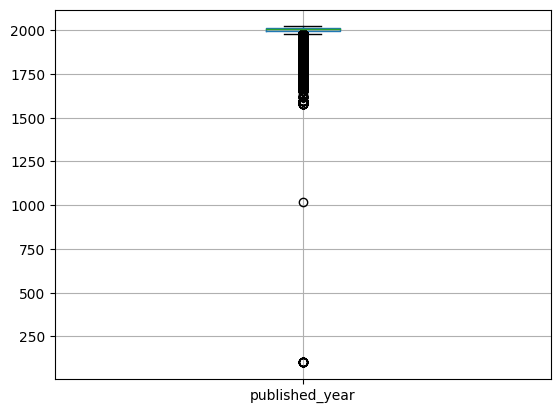

In [107]:
df_all_data_filtered_processed.boxplot(column='published_year')

## Review Year Column

In [108]:
df_all_data_filtered_processed['review_year'].describe().T

count    502041.000000
mean       2005.294233
std           4.675203
min        1969.000000
25%        2001.000000
50%        2005.000000
75%        2009.000000
max        2013.000000
Name: review_year, dtype: float64

On July 16, 1995, Amazon opened as an online bookseller. So, all reviews older than 1995 are removed.

In [109]:
df_all_data_filtered_processed[df_all_data_filtered_processed['review_year'] < 1995]

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
187490,5.0,This book was given to me when I was three yea...,1969,[Other],Other,[Other],1837,1.0
323578,5.0,Pretty good at providing me with the fundament...,1969,[Other],Other,[Other],2006,1.0
351462,1.0,A book as messy and nasty as some of the autho...,1969,[Other],Other,[Other],2005,0.7


In [110]:
df_all_data_filtered_processed.shape

(502041, 8)

In [112]:
df_all_data_filtered_processed = df_all_data_filtered_processed[df_all_data_filtered_processed['review_year'] >= 1995]
df_all_data_filtered_processed

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
0,4.0,"This is a pretty good book with clear content,...",2005,[Other],Other,[Other],2011,0.764706
1,4.0,"Terry Pratchett's first novel, ""The Carpet Peo...",2009,[Other],Harper Collins,[Fiction],2009,1.000000
2,4.0,It must have been around 1870 when very capabl...,2011,[Other],Other,[Other],1908,1.000000
3,5.0,I first read this book when I was in my early ...,2007,[C. S. Lewis],Other,[Fiction],2017,1.000000
4,3.0,When Patrick Kelsey learns that it is a woman ...,2002,[Other],Other,[Other],1992,1.000000
...,...,...,...,...,...,...,...,...
502039,4.0,Once you realize these are intended as fun lig...,2004,[Other],Other,[Fiction],2002,1.000000
502040,3.0,"In an utterly realistic, noir novel, the reade...",2010,[Other],Other,[Other],1992,0.833333
502041,5.0,This Bible commentary was recommended to me by...,2007,[Other],Other,[Religion],2016,1.000000
502042,5.0,It is a beautiful illustration of a childs lif...,2013,[Other],Other,[Other],2016,1.000000


In [113]:
df_all_data_filtered_processed.shape

(502038, 8)

# Processed Datasets Saving

In [114]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           502038 non-null  int64  
 1   review          502038 non-null  float64
 2   text            502038 non-null  object 
 3   review_year     502038 non-null  int64  
 4   authors         502038 non-null  object 
 5   publisher       502038 non-null  object 
 6   categories      502038 non-null  object 
 7   published_year  502038 non-null  int64  
 8   helpfulness     502038 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 34.5+ MB


In [115]:
#A reduced Dataset is created to process Text Column and Apply sentiment Analysis.
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
387345,387345,I liked this book because it was discriptive a...
260305,260305,If anyone hasn't read this book before I recom...
340897,340897,For decades devout Christians have hunkered in...
325501,325501,I had high hopes for this book after enjoying ...
116137,116137,He wowed us with the tale of a board game that...
304232,304232,The Spiritual Tourist's greatest strength is t...
117227,117227,This is one of those &quot;must own&quot; book...
231953,231953,I don't think I've been forced to read a book ...
21834,21834,"This was one of my favorite books as a child, ..."
94893,94893,"Melanie Wiggins' ""Torpedoes in the Gulf"" (pape..."


In [116]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [117]:
df_reduced.to_csv('../data/processed/df_reduced.csv')